In [1]:
import pandas as pd 
import numpy as np
import math
from datetime import datetime

In [58]:
data = pd.read_csv("fakeEmt.csv")

/Users/bilalqadar/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [59]:
data.groupby("senderAccountNumber")
data.head()

,senderAccountNumber,senderBank,senderLatitude,senderLongitude,senderPostalCode,senderISP,receiverEmail,receiverBank,timestamp,money_amount,currency
0,34589061912,Bank_A,53.521483,-113.581564,T5R1J2,Cable Cable,Christy_Kesson@hotmail.com.mx,Bank_E,2018-06-01 19:02:54.026-0400,500,CAD
1,34589061912,Bank_A,53.521483,-113.581564,T5R1J2,Virgin Mobile,Mathew_Shorr@wanadoo.co.uk,Bank_E,2018-02-28 23:06:24.520-0500,250,CAD
2,34589061912,Bank_A,53.521483,-113.581564,T5R1J2,Cable Cable,Mathew_Shorr@wanadoo.co.uk,Bank_E,2018-06-27 19:37:33.822-0400,1500,CAD
3,34589061912,Bank_A,53.521483,-113.581564,T5R1J2,Cable Cable,Mathew_Shorr@wanadoo.co.uk,Bank_E,2017-11-29 10:48:14.105-0500,100,CAD
4,34589061912,Bank_A,53.521483,-113.581564,T5R1J2,Cable Cable,Mathew_Shorr@wanadoo.co.uk,Bank_E,2017-11-24 21:15:17.010-0500,50,CAD


# Recatagorizing Data
## Changed the column headings to the sender account number with attributes about the sender account as the rows.

In [4]:
test_len = 10000
data_len = len(data)
new_data = {}
start_time = datetime.now()

for i in range(test_len): 
    row = data.iloc[i]
    sender = row['senderAccountNumber']
    amount = row['money_amount']
    bank = row['senderBank']
    postal_code = row['senderPostalCode']
    location = (row['senderLatitude'],row['senderLongitude'])
    receiver = row['receiverEmail']
    time = row['timestamp']
    ISP = row['senderISP']
    
    if sender not in new_data: 
        new_data[sender] = {'transactions':1,'amounts':[],'banks':[],'postal_codes':[],'locations':[],'receivers':{},'time_stamps':[],'senderISP':[]}
    else:
        new_data[sender]['transactions'] += 1
    
    new_data[sender]['amounts'].append(amount)
    new_data[sender]['time_stamps'].append(time)

    if postal_code not in new_data[sender]['postal_codes']:
        new_data[sender]['postal_codes'].append(postal_code)
    if location not in new_data[sender]['locations']:
        new_data[sender]['locations'].append(location)
    
    if receiver in new_data[sender]['receivers']:
        new_data[sender]['receivers'][receiver] += 1 
    else: 
        new_data[sender]['receivers'][receiver] = 1
        
    if ISP not in new_data[sender]['senderISP']:
        new_data[sender]['senderISP'].append(ISP)
        
duration = datetime.now() - start_time
print("Parsed data in: ", duration)

Parsed data in:  0:00:02.877361


# Saving New Dataset

In [5]:
sender = pd.DataFrame.from_dict(new_data)

In [6]:
sender.head()

,34589061912,82965028419,53703119240,61428178359,65205561113,70969790101,4098205472,66508613611,55899054047,3572637572,...,52490931961,39827106657,22341825598,98470358344,89439336238,19745236501,38609351629,80521274689,85964701137,31980835765
transactions,13,16,4,3,1,1,1,2,1,1,...,2,1,1,1,11,36,10,6,1,61
amounts,"[500.0, 250.0, 1500.0, 100.0, 50.0, 900.0, 400...","[2571.0, 2571.0, 2571.0, 2571.0, 2571.0, 2571....","[30.0, 50.0, 40.0, 30.0]","[60.0, 150.0, 30.0]",[150.0],[40.0],[30.0],"[50.0, 40.0]",[40.0],[100.0],...,"[20.0, 20.0]",[50.0],[230.0],[10.0],"[30.0, 20.0, 60.0, 60.0, 20.0, 50.0, 25.0, 20....","[20.0, 30.0, 20.0, 40.0, 60.0, 50.0, 50.0, 50....","[32.0, 20.0, 10.0, 10.0, 50.0, 14.0, 10.0, 15....","[20.0, 20.0, 30.0, 20.0, 50.0, 80.0]",[20.0],"[20.0, 80.0, 30.0, 20.0, 20.0, 20.0, 60.0, 30...."
banks,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
postal_codes,[T5R1J2],[L8L5J6],[R2C0W7],[L4M3Y9],[V3E1N7],[V6Y2J5],[L1N2N6],[J1H4K1],[V1J5P1],[E9A1G7],...,[N7M5A5],[H2L2V8],[T5P4N6],[G2J1K7],[G3G3A7],[J2G3Z4],[V1Z1J2],[N6E3V9],[J4V1P1],[R7B3C2]
locations,"[(53.521483, -113.581564)]","[(43.260931, -79.85234799999998)]","[(49.9054787, -97.0)]","[(44.399242, -79.6783)]","[(49.289239, -122.76874)]","[(49.1673575, -123.131488)]","[(43.8801835, -78.9405435)]","[(45.40064, -71.894077)]","[(56.251576, -120.859184)]","[(46.738577, -65.852813)]",...,"[(42.399727, -82.1699135)]","[(45.522452, -73.556348)]","[(53.536178, -113.588953)]","[(46.843702, -71.282585)]","[(46.865811, -71.350484)]","[(45.389863, -72.740319)]","[(49.86224516, -119.5551695)]","[(42.941392, -81.243691)]","[(45.482987, -73.48156800000002)]","[(49.82759365, -99.97286728)]"


In [7]:
mean_amount = []   

#Mean transaction amount per account ID
for name in sender.iteritems():
    value = name[1]['amounts']
    amount = 0 
    bad_values = 0
    #Using a loop and not sum because the some of the fucks in here are strings
    for item in value:
        try:
            amount += float(item)
        except ValueError: 
            bad_values += 1 
    
    transaction_number = len(value) - bad_values
    
    if transaction_number != 0:
        mean = amount/transaction_number
        mean_amount.append(mean)
    else: 
        mean_amount.append(0)
        
sender.loc['mean_transaction_amount'] = mean_amount

In [8]:
#Standard Deviation for amounts 
std_dev = []
z_score = [] 
for name in sender.iteritems(): 
    value = name[1]['amounts']
    mean = name[1]['mean_transaction_amount']
    variance = 0 
    bad_values = 0 
    for item in value: 
        try: 
            variance += math.pow((float(item) - mean),2)
        except: 
            bad_values += 1
    
    transaction_number = len(value) - bad_values 
    if transaction_number != 0: 
        std = math.sqrt(variance)/transaction_number
        std_dev.append(std)
    else: 
        std_dev.append(0)
        
sender.loc['transacton_std_dev'] = std_dev

In [9]:
#Number of Different ISP's 
ISP_changes = [] 

for name in sender.iteritems(): 
    value = name[1]['senderISP']
    ISP_changes.append(len(value))
    
sender.loc['total_ISPs'] = ISP_changes

In [10]:
def timeBetweenFirstLast(dates):
    '''
    Given a list of dates of the form %Y-%m-%d %H:%M:%S.%f%z return a datetime.timedelta
    object that contains the amount of time between the first and last (chronologically) dates
    '''
    # convert to datetime objects
    datetimes = []
    for date in dates:
        datetimes.append(datetime.strptime(date, "%Y-%m-%d %H:%M:%S.%f%z"))
     
    # sort chronologically
    datetimes.sort()

    # return time between first and last dates
    return np.abs(datetimes[-1] - datetimes[0])

transaction_frequency = [] 
for name in sender.iteritems(): 
    value = name[1]['time_stamps']
    difference = timeBetweenFirstLast(value)
    transaction_frequency.append(((difference/name[1]['transactions']).total_seconds())/86400)
#TODO: Rename time between transactions
sender.loc['transaction_frequency'] = transaction_frequency

In [11]:
sender[34589061912]['transaction_frequency']

22.85198761039352

In [12]:
sender.head(15)

,34589061912,82965028419,53703119240,61428178359,65205561113,70969790101,4098205472,66508613611,55899054047,3572637572,...,52490931961,39827106657,22341825598,98470358344,89439336238,19745236501,38609351629,80521274689,85964701137,31980835765
transactions,13,16,4,3,1,1,1,2,1,1,...,2,1,1,1,11,36,10,6,1,61
amounts,"[500.0, 250.0, 1500.0, 100.0, 50.0, 900.0, 400...","[2571.0, 2571.0, 2571.0, 2571.0, 2571.0, 2571....","[30.0, 50.0, 40.0, 30.0]","[60.0, 150.0, 30.0]",[150.0],[40.0],[30.0],"[50.0, 40.0]",[40.0],[100.0],...,"[20.0, 20.0]",[50.0],[230.0],[10.0],"[30.0, 20.0, 60.0, 60.0, 20.0, 50.0, 25.0, 20....","[20.0, 30.0, 20.0, 40.0, 60.0, 50.0, 50.0, 50....","[32.0, 20.0, 10.0, 10.0, 50.0, 14.0, 10.0, 15....","[20.0, 20.0, 30.0, 20.0, 50.0, 80.0]",[20.0],"[20.0, 80.0, 30.0, 20.0, 20.0, 20.0, 60.0, 30...."
banks,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
postal_codes,[T5R1J2],[L8L5J6],[R2C0W7],[L4M3Y9],[V3E1N7],[V6Y2J5],[L1N2N6],[J1H4K1],[V1J5P1],[E9A1G7],...,[N7M5A5],[H2L2V8],[T5P4N6],[G2J1K7],[G3G3A7],[J2G3Z4],[V1Z1J2],[N6E3V9],[J4V1P1],[R7B3C2]
locations,"[(53.521483, -113.581564)]","[(43.260931, -79.85234799999998)]","[(49.9054787, -97.0)]","[(44.399242, -79.6783)]","[(49.289239, -122.76874)]","[(49.1673575, -123.131488)]","[(43.8801835, -78.9405435)]","[(45.40064, -71.894077)]","[(56.251576, -120.859184)]","[(46.738577, -65.852813)]",...,"[(42.399727, -82.1699135)]","[(45.522452, -73.556348)]","[(53.536178, -113.588953)]","[(46.843702, -71.282585)]","[(46.865811, -71.350484)]","[(45.389863, -72.740319)]","[(49.86224516, -119.5551695)]","[(42.941392, -81.243691)]","[(45.482987, -73.48156800000002)]","[(49.82759365, -99.97286728)]"
receivers,"{'Christy_Kesson@hotmail.com.mx': 1, 'Mathew_S...","{'Lakenya_Goud@yahoo.com.mx': 7, 'Keena-Gaffer...",{'Keena-Gaffer@wanadoo.co.uk': 4},{'Keena-Gaffer@wanadoo.co.uk': 3},{'Keena-Gaffer@wanadoo.co.uk': 1},{'Keena-Gaffer@wanadoo.co.uk': 1},{'Keena-Gaffer@wanadoo.co.uk': 1},{'Keena-Gaffer@wanadoo.co.uk': 2},{'Keena-Gaffer@wanadoo.co.uk': 1},{'Keena-Gaffer@wanadoo.co.uk': 1},...,{'Chanel_Tankesly@me.com': 2},{'Chanel_Tankesly@me.com': 1},{'Chanel_Tankesly@me.com': 1},{'Chin-Buonanno@virginmedia.com': 1},{'Grazyna_Frein@rocketmail.com': 11},{'Grazyna_Frein@rocketmail.com': 36},{'Grazyna_Frein@rocketmail.com': 10},{'Grazyna_Frein@rocketmail.com': 6},{'Grazyna_Frein@rocketmail.com': 1},{'Grazyna_Frein@rocketmail.com': 61}
time_stamps,"[2018-06-01 19:02:54.026-0400, 2018-02-28 23:0...","[2018-06-01 05:37:11.480-0400, 2018-03-01 09:4...","[2018-03-05 10:34:10.544-0500, 2017-09-06 09:3...","[2018-03-15 18:05:48.294-0400, 2017-09-20 09:2...",[2018-04-02 13:26:37.489-0400],[2018-06-11 21:43:44.336-0400],[2018-03-14 16:54:20.138-0400],"[2017-09-21 08:31:28.719-0400, 2018-06-24 10:2...",[2018-06-14 09:46:46.700-0400],[2017-09-09 21:53:23.520-0400],...,"[2018-04-26 20:56:32.095-0400, 2018-04-20 22:3...",[2018-04-28 12:14:48.845-0400],[2018-04-07 17:31:05.295-0400],[2018-01-28 19:45:30.461-0500],"[2018-06-01 13:23:08.746-0400, 2018-06-15 22:5...","[2018-06-01 16:00:13.524-0400, 2018-06-15 21:3...","[2018-03-01 23:08:49.779-0500, 2018-02-26 09:0...","[2018-05-04 16:43:26.718-0400, 2018-05-17 18:1...",[2018-05-19 15:19:29.818-0400],"[2018-05-31 18:54:56.777-0400, 2018-05-01 12:5..."
senderISP,"[Cable Cable, Virgin Mobile, AT&T Services]","[Primus Telecommunications Canada, Bell Canada...",[Scotia McLeod],"[Scotia McLeod, Rogers Cable]",[Q9 Networks],[Rogers Cable],[Scotia McLeod],"[Scotia McLeod, Rogers Cable]",[Scotia McLeod],[Rogers Cable],...,[Xplornet Communications],[EastLink],[Rogers Cable],[Sunwire],"[Vianet, Bank of Nova Scotia, Cogeco Cable]",[Bell Canada],[Bell Canada],[Bell Canada],[Cogeco Cable],"[Telus Communications, Bell Canada]"
mean_transaction_amount,584.615,1291.38,37.5,80,150,40,30,45,40,100,...,20,50,230,10,37.4545,41.9167,18.6,36.6667,20,40.9672
transacton_std_dev,159.732,287.12,4.14578,29.4392,0,0,0,3.53553,0,0,...,0,0,0,0,5.73429,3.44856,3.88639,9.02671,0,3.8105

# Clustering Data

In [29]:
import sklearn
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

In [27]:
cluster_amount = 5

In [44]:
mstd = [] 
m_total_transactions = [] 
mtransf = [] 
mean_ISP = [] 

transf_std = [] 
transf_total_transactions = [] 
transf_ISP = []  

ISP_std = [] 
ISP_total_transactions = [] 

total_transactions_std = [] 

for name in sender.iteritems(): 
    account_num = name[0]
    value = name[1]
    
    total_transaction = value['transactions']
    mean_trans = value['mean_transaction_amount']
    std_trans = value['transacton_std_dev']
    trans_frequency = value['transaction_frequency']
    senderISP = value['total_ISPs']
    
    mstd.append([mean_trans,std_trans])
    m_total_transactions.append([mean_trans,total_transaction])
    mtransf.append([trans_frequency,mean_trans])
    mean_ISP.append([senderISP,mean_trans])
    
    transf_std.append([trans_frequency,std_trans])
    transf_total_transactions.append([trans_frequency,total_transaction])
    transf_ISP.append([senderISP,trans_frequency])
    
    ISP_total_transactions.append([senderISP,total_transaction])
    ISP_std.append([senderISP,std_trans])
    
    total_transactions_std.append([total_transaction,std_trans])


mstd = sklearn.preprocessing.scale(mstd)
m_total_transactions = sklearn.preprocessing.scale(m_total_transactions)
mtransf = sklearn.preprocessing.scale(mtransf)
mean_ISP = sklearn.preprocessing.scale(mean_ISP)
transf_std = sklearn.preprocessing.scale(transf_std)
transf_total_transactions = sklearn.preprocessing.scale(transf_total_transactions)
transf_ISP = sklearn.preprocessing.scale(transf_ISP)
ISP_std = sklearn.preprocessing.scale(ISP_std)
ISP_total_transactions = sklearn.preprocessing.scale(ISP_total_transactions)
total_transactions_std = sklearn.preprocessing.scale(total_transactions_std)

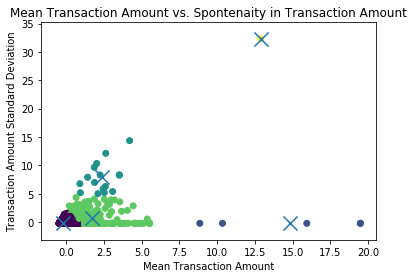

In [45]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(mstd)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in mstd: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Mean Transaction Amount vs. Spontenaity in Transaction Amount')
plt.ylabel('Transaction Amount Standard Deviation')
plt.xlabel('Mean Transaction Amount')
plt.show()

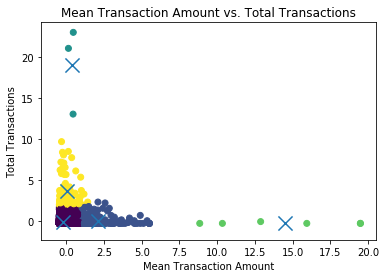

In [46]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(m_total_transactions)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in m_total_transactions: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Mean Transaction Amount vs. Total Transactions')
plt.ylabel('Total Transactions')
plt.xlabel('Mean Transaction Amount')
plt.show()

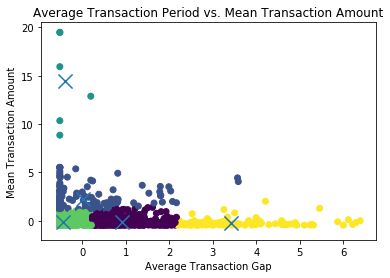

In [47]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(mtransf)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in mtransf: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Average Transaction Period vs. Mean Transaction Amount')
plt.xlabel('Average Transaction Gap')
plt.ylabel('Mean Transaction Amount')
plt.show()

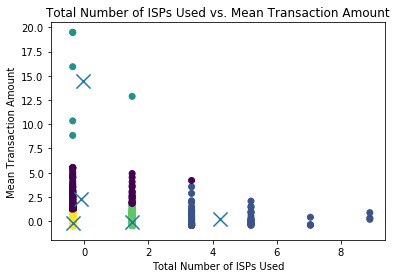

In [48]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(mean_ISP)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in mean_ISP: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Total Number of ISPs Used vs. Mean Transaction Amount')
plt.xlabel('Total Number of ISPs Used')
plt.ylabel('Mean Transaction Amount')
plt.show()

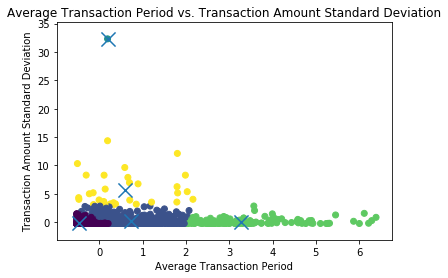

In [49]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(transf_std)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in transf_std: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Average Transaction Period vs. Transaction Amount Standard Deviation')
plt.ylabel('Transaction Amount Standard Deviation')
plt.xlabel('Average Transaction Period')
plt.show()

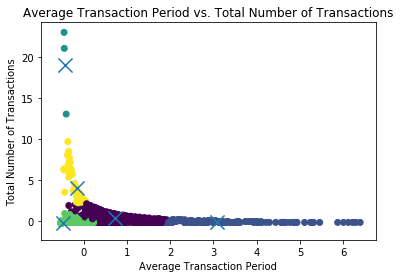

In [50]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(transf_total_transactions)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in transf_total_transactions: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Average Transaction Period vs. Total Number of Transactions')
plt.ylabel('Total Number of Transactions')
plt.xlabel('Average Transaction Period')
plt.show()

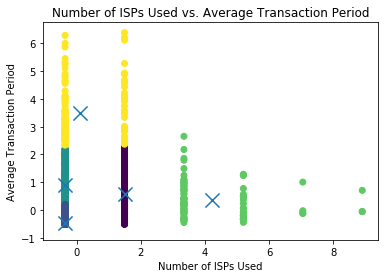

In [51]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(transf_ISP)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in transf_ISP: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Number of ISPs Used vs. Average Transaction Period')
plt.xlabel('Number of ISPs Used')
plt.ylabel('Average Transaction Period')
plt.show()

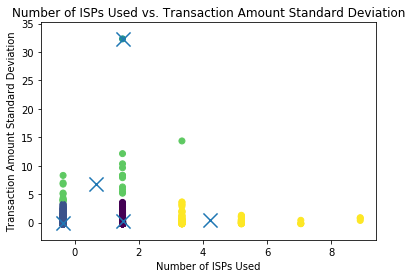

In [52]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(ISP_std)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in ISP_std: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Number of ISPs Used vs. Transaction Amount Standard Deviation')
plt.ylabel('Transaction Amount Standard Deviation')
plt.xlabel('Number of ISPs Used')
plt.show()

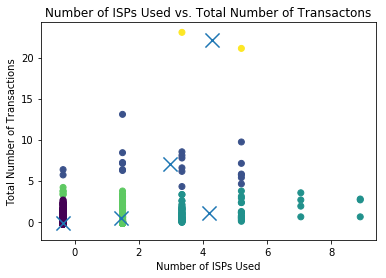

In [53]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(ISP_total_transactions)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in ISP_total_transactions: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Number of ISPs Used vs. Total Number of Transactons')
plt.ylabel('Total Number of Transactions')
plt.xlabel('Number of ISPs Used')
plt.show()

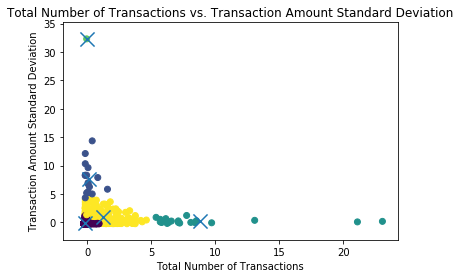

In [54]:
#print(np.shape(cluster_data_mstd))
kmeans = KMeans(n_clusters=cluster_amount, random_state=0).fit(total_transactions_std)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
np.shape(centers)

x = [] 
y = []

center_x = [] 
center_y = [] 

for point in total_transactions_std: 
    x.append(point[0])
    y.append(point[1])
    
for point in centers: 
    center_x.append(point[0])
    center_y.append(point[1])
    
plt.scatter(x,y,c=labels.astype(float))
plt.scatter(center_x,center_y,marker="x",s=200)
plt.title('Total Number of Transactions vs. Transaction Amount Standard Deviation')
plt.ylabel('Transaction Amount Standard Deviation')
plt.xlabel('Total Number of Transactions')
plt.show()